<a href="https://colab.research.google.com/github/gaargly/gaargly.github.io/blob/master/2021_06_30_Lira_3rdAssignment_Tyler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment, we will `telekom_churn` dataset to explore the data using visualization techniques. Please note that for every visualization you apply, you need to interpret what you have found in order to get full credit.

**1. Import the data first**

In [60]:
#codes here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv")
df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**2. Check the types of the variable that you take into account along the way.**

In [ ]:
#codes here

df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

**3. Draw the histogram of `total day minutes` and `total intl calls` and interpret the result.**

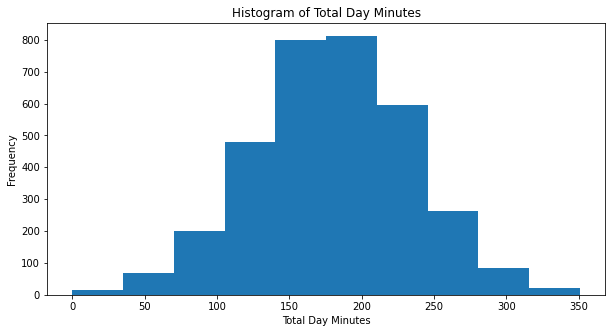

In [ ]:
#codes here
plt.figure(figsize=(10,5))
plt.hist(df['Total day minutes'])
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')
plt.title('Histogram of Total Day Minutes')
plt.show()

The above histogram shows us the frequency of the variable "Total day minutes" in the telecom_churn dataset. The histogram reads as follows:
    
* The data appear to be approximately normally distributed.
* The most frequent interval gathers around total day minutes of 200.
* The next frequent interval gathers around total day minutes of 150.
* The data range from 0 to 350 minutes, with a mean between 150 and 200 minutes (at around 175 minutes).

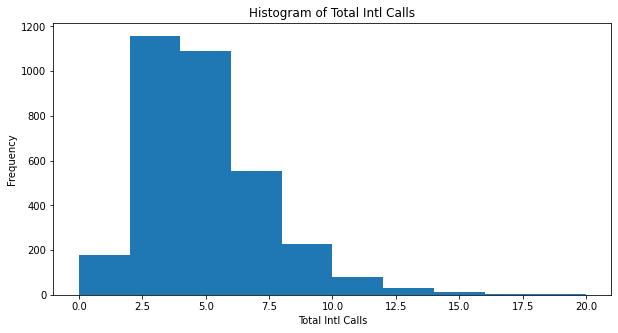

In [ ]:
#codes here
plt.figure(figsize=(10,5))
plt.hist(df['Total intl calls'])
plt.xlabel('Total Intl Calls')
plt.ylabel('Frequency')
plt.title('Histogram of Total Intl Calls')
plt.show()

The above histogram shows us the frequency of the variable "Total intl calls" in the telecom_churn dataset. The histogram reads as follows:
    
* The data have a right skew.
* The most frequent interval gathers around total intl calls of 2.5.
* The next frequent interval gathers around total day calls of 5.0.
* A very small proportion of accounts had more than 10.0 calls in this dataset.

**4. This time draw the density plot of the same variable and discuss the difference between these two plots**

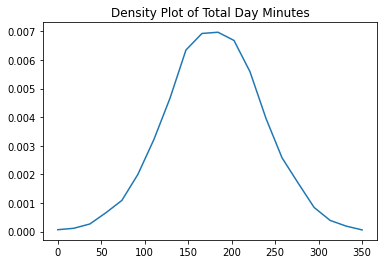

In [ ]:
#codes here

from scipy.stats import kde

data = df['Total day minutes']
density = kde.gaussian_kde(data)
x = np.linspace(0,350,20)
y = density(x)

plt.plot(x,y)
plt.title("Density Plot of Total Day Minutes")
plt.show()

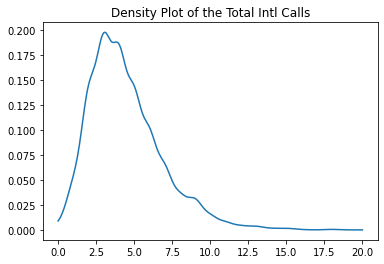

In [ ]:
#codes here

data = df['Total intl calls']
density = kde.gaussian_kde(data)
x = np.linspace(0,20,300)
y = density(x)

plt.plot(x,y)
plt.title("Density Plot of the Total Intl Calls")
plt.show()

Density plots are, by definition, smoothed-out versions of the respective historgrams. We get roughly the same information from the density plots as we do from the histograms, which is that "Total day minutes" is normally distributed, whereas "Total intl calls" has a significant right skew.

**5. Draw the distplot, boxplot, and violin plot of `total intl calls` and interpret the result**

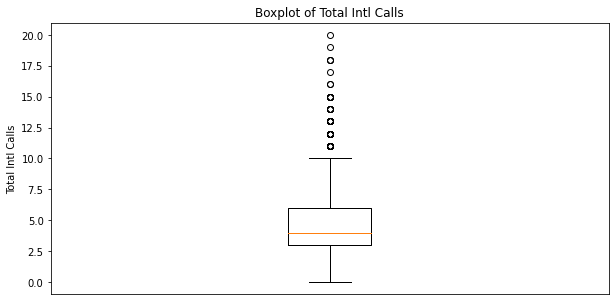

In [57]:
# Boxplot

plt.figure(figsize=(10,5))
plt.boxplot(df['Total intl calls'])
plt.ylabel('Total Intl Calls')
plt.title('Boxplot of Total Intl Calls')
plt.xticks([])
plt.show()

A `box plot` helps us to understand the extent to which data spreads out. We see from the above box plot of "Total intl calls" that:

* Minimum: The smallest value excluding any outliers is 0.0
* First quartile (25th Percentile): The middle value between the smallest number (not the minimum) and the median of the dataset is a little over 2.5
* Median of the data: The middle value of the dataset is around 3.5
* Third quartile: The middle value between the largest number and the median of the dataset is around 6.0
* Maximum: The biggest value excluding any outliers is 10.0
* There are 10 outliers with values bigger than 10.0

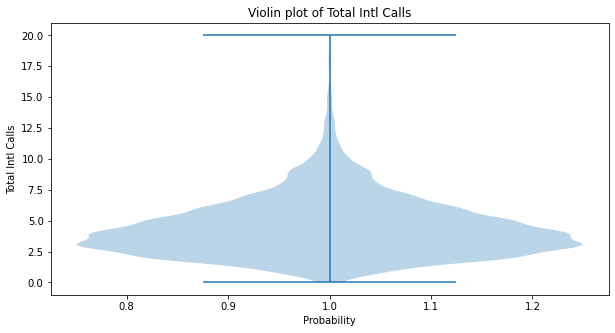

In [59]:
# Violin Plot

plt.figure(figsize=(10,5))
plt.violinplot(df['Total intl calls'])
plt.xlabel('Probability')
plt.ylabel('Total Intl Calls')
plt.title('Violin plot of Total Intl Calls')
plt.show()

The above violin plot of "Total intl calls" includes a rotated kernel density plot on each side. It shows us the full distribution of the data, and confirms that the data are most dense between 2.5 and 5.0 calls.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


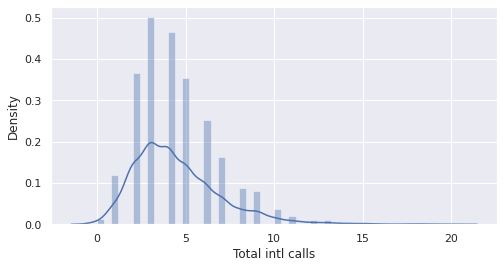

In [61]:
# Distplot

sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = df['Total intl calls']
ax = sns.distplot(x)
plt.show()

The above distplot of "Total intl calls" shows us similar information as the violin plot, which is that the data are most dense between 2.5 and 5.0 calls.

**6. Using `churn` and `customer service calls` variables, draw the count plot and interpret the result***

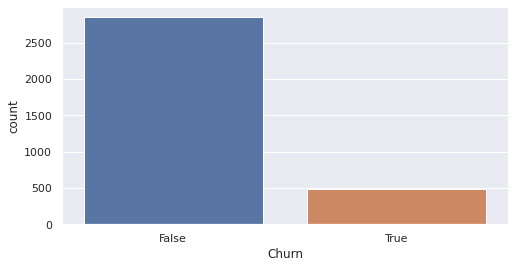

In [62]:
#codes here

p = sns.countplot(data=df, x = 'Churn')

Most customers do not churn.

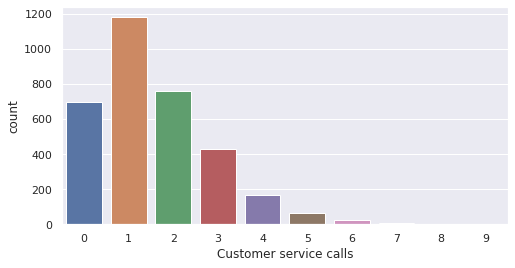

In [63]:
#codes here

p = sns.countplot(data=df, x = 'Customer service calls')

The most frequent value for 'Customer service calls' is 1.0, followed by 2, 0, 3, 4, 5, 6, and 7. It's interesting that a significant number of customers don't seem to make customer service calls, since 0 is the third most frequent number of calls.

**7. Identify the correlation between the variables using pandas and seaborn libraries**

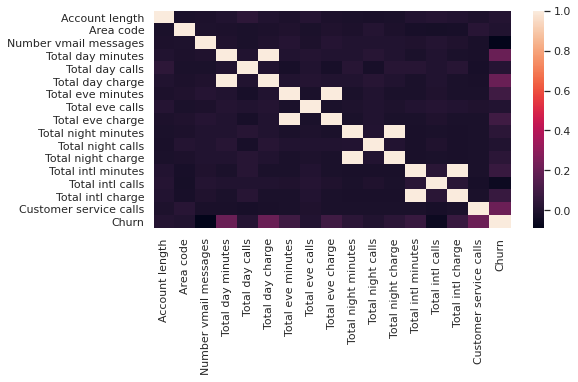

In [64]:
#codes here

sns.heatmap(df.corr())
plt.show()

* Total day minutes is strongly correlated with Total day charge.
* Total eve minutes is strongly correlated with Total eve charge.
* Total night minutes is strongly correlated with Total night charge.
* Total intl minutes is strongly correlated with Total intl charge.


**8. Detect the relationship between `total day minutes` and `total night minutes` variable using a visualization technique of your choice**

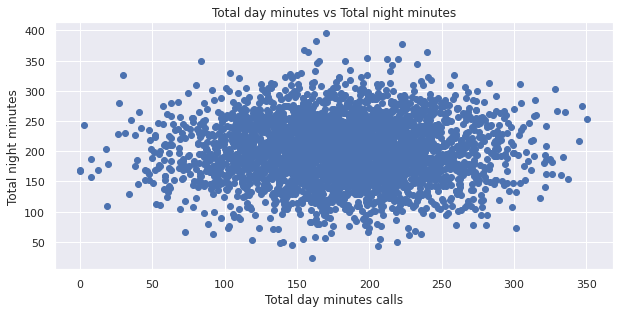

In [69]:
#codes here

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.scatter(df['Total day minutes'],df['Total night minutes'])
plt.xlabel('Total day minutes calls')
plt.ylabel('Total night minutes')
plt.title('Total day minutes vs Total night minutes')
plt.show()

There does not appear to be a linear relationship between Total day minutes and Total night minutes.

**9. Try to understand the relationship between `total day minutes` and two categorical variables, namely `churn` and `customer service calls` using catplot.**
Hint: try different values of `customer service calls`

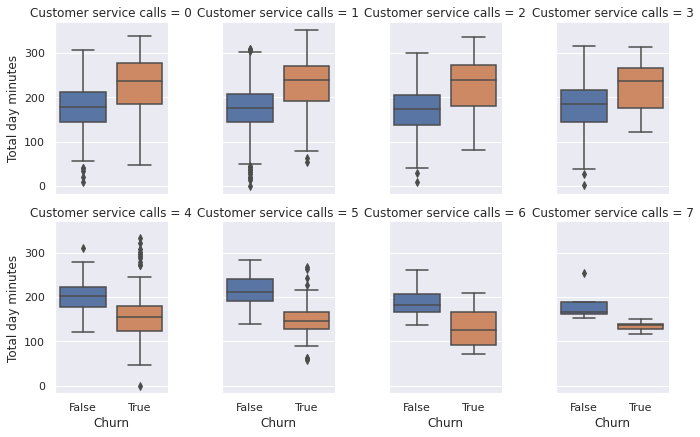

In [72]:
#codes here

sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
);

From the above catplot, we see that the median number of total day minutes for customers who have churned is higher than the median number of total day minutes for customers who have not churned, for customer service calls under 4. Starting at 4 calls, the trend reverses and the median number of total day minutes for customers who have churned is lower than the median number of total day minutes for customers who have not churned. 

A clear relationship between total day minutes and churn is difficult to detect here.

**10. Using subplot function, draw histogram of all numerical variables**

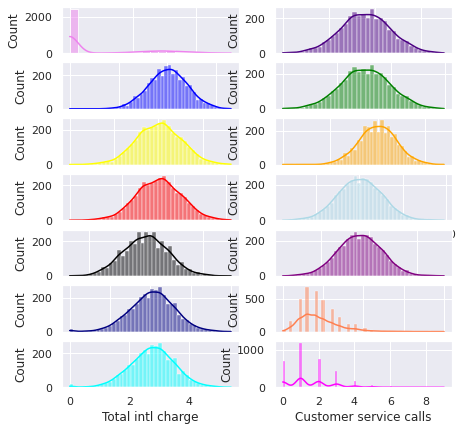

In [87]:
#codes here

fig, axs = plt.subplots(7, 2, figsize=(7, 7))

sns.histplot(data=df, x="Number vmail messages", kde=True, color="violet", ax=axs[0, 0])
sns.histplot(data=df, x="Total day minutes", kde=True, color="indigo", ax=axs[0, 1])
sns.histplot(data=df, x="Total day calls", kde=True, color="blue", ax=axs[1, 0])
sns.histplot(data=df, x="Total day charge", kde=True, color="green", ax=axs[1, 1])
sns.histplot(data=df, x="Total eve minutes", kde=True, color="yellow", ax=axs[2, 0])
sns.histplot(data=df, x="Total eve calls", kde=True, color="orange", ax=axs[2, 1])
sns.histplot(data=df, x="Total eve charge", kde=True, color="red", ax=axs[3, 0])
sns.histplot(data=df, x="Total night minutes", kde=True, color="lightblue", ax=axs[3, 1])
sns.histplot(data=df, x="Total night calls", kde=True, color="black", ax=axs[4, 0])
sns.histplot(data=df, x="Total night charge", kde=True, color="purple", ax=axs[4, 1])
sns.histplot(data=df, x="Total intl minutes", kde=True, color="navy", ax=axs[5, 0])
sns.histplot(data=df, x="Total intl calls", kde=True, color="coral", ax=axs[5, 1])
sns.histplot(data=df, x="Total intl charge", kde=True, color="cyan", ax=axs[6, 0])
sns.histplot(data=df, x="Customer service calls", kde=True, color="magenta", ax=axs[6, 1])

plt.show()